<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 4

## Q1:Discrete FFT and Power Spectrum

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

**1** Using the data from the hourly time series at Deep Cove (`dc`), show that the canned `fft` routine returns the correct discrete Fourier Transform of a suitable subset of the data (your choice on what subset).  You can do this graphically, by comparing the amplitude and the phase of the Fourier components, or simply show that the resulting numbers are the same.  

Some Hints: 
  - ignore bad data (rather than dealing with it "properly").  Make sure the units of your FT are: $\mathrm{^oC\, s}$.
  - If you want to compute the DFT efficiently, form the matrix $F$ referred to in the notes, and plot some of the time series associated with the different entries and make sure they look like Sines and Cosines and that the edge conditions are what you want.  Alternately, you can use your dft routine from the last assignment, and chose your frequencies properly.


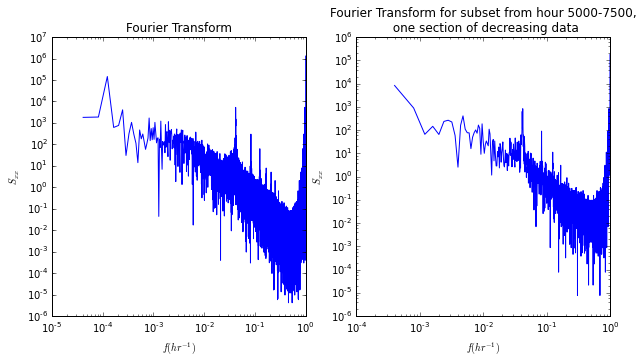

In [191]:
dc= dc[~np.isnan(dc)]
jb= jb[~np.isnan(jb)]

dcsub=dc[5000:7500:]
t=np.arange(0, len(dc),1.0)
tsub=t[5000:7500:]

T=t[-1]-t[0]
N=len(dc)
dt=np.median(np.diff(t))
f=np.arange(0,(len(dc)-1.)/T+.00001, 1./T)

X=1j*f*0.
for num, ff in enumerate(f):
    X[num]= np.sum(dc*np.exp(-1j*2.*np.pi*t*ff)*dt)
Sxx= X*np.conj(X)/T
fig=plt.figure(figsize=(10, 5))
ax=fig.add_subplot(1,2,1)
ax.loglog(f[f>0], Sxx[f>0]/2.)
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$S_{xx}$')
ax.set_title('Fourier Transform ')

Tsub=tsub[-1]-tsub[0]
dtsub=np.median(np.diff(tsub))
fsub=np.arange(0,(len(dcsub)-1.)/Tsub+.00001,1./Tsub)
Xsub=1j*fsub*0
for num, ff in enumerate(fsub):
    Xsub[num]= np.sum(dcsub*np.exp(-1j*2.*np.pi*tsub*ff)*dtsub)
Sxxsub= Xsub*np.conj(Xsub)/Tsub
ax=fig.add_subplot(1,2,2)
ax.loglog(fsub[fsub>0], Sxxsub[fsub>0]/2.)
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$S_{xx}$')
ax.set_title('Fourier Transform for subset from hour 5000-7500,\n one section of decreasing data')


In [3]:
print 'first few values of Fourier Transform to compare to fft:'
print Sxx[:5]

first few values of Fourier Transform to compare to fft:
[  3.55107858e+05+0.j   1.65896870e+04+0.j   1.78233793e+03+0.j
   1.31673514e+02+0.j   2.90564249e+02+0.j]


YOUR ANSWER HERE

first few values of X, from DFT
[ 251820.39933631    +0.j           -7097.84142846 -6178.63485223j
   -4318.08470985 +8555.40894378j  -80719.90869899+24246.96247624j
   -1842.65403536 +5164.3157878j ]
first few values of X, from fft
[ 251820.39933631    +0.j           -7108.14816126 -6178.49483444j
   -4334.91303553 +8557.14621209j  -80736.30650599+24215.66103384j
   -1837.87517462 +5158.43073566j]


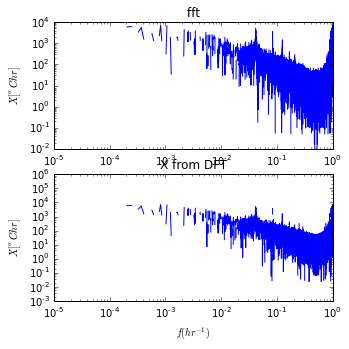

In [203]:
Xf=np.fft.fft(dc)
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(2,1,1)
ax.loglog(f[f>0], Xf[f>0])
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$X[^oC hr]$')
ax.set_title('fft ')

ax=fig.add_subplot(2,1,2)
ax.loglog(f[f>0], X[f>0])
#ax.set_ylim(10^-2, 10^4,1)
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$X[^oC hr]$')
ax.set_title('X from DFT')
print 'first few values of X, from DFT'
print X[:5]
print 'first few values of X, from fft'
print Xf[:5]


These look similar, and the first values are the same for both fourier transforms!

    

**2** Now, we can go ahead and use `np.fft.fft`.  Estimate the power spectrum for the Deep Cove time series (again go ahead and skip over gaps, though some of the bigs ones will screw up your frequencies a bit)

  - Use *all* the data.  
  - Report your results in proper SI units.
  - Indicate on your plot at least a couple of important frequencies

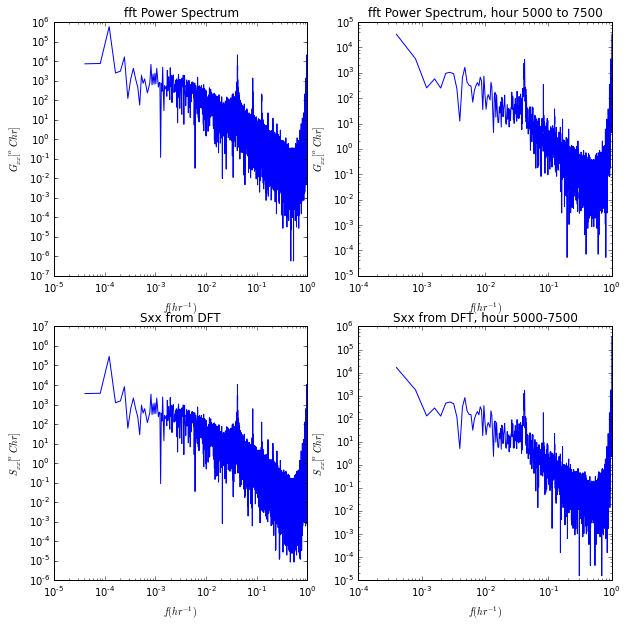

In [83]:
Xsubnew=np.fft.fft(dcsub)
#Tsub=tsub[-1]-tsub[0]
Gxxsub=2.*np.conj(Xsubnew)*Xsubnew/Tsub
fig= plt.figure(figsize=(10,10))
ax=fig.add_subplot(222)
ax.loglog(fsub[fsub>0],Gxxsub[fsub>0])
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$G_{xx}[^oC hr]$')
ax.set_title('fft Power Spectrum, hour 5000 to 7500')


#T=t[-1]-t[0]
Xf=np.fft.fft(dc)
Gxx=2.*np.conj(Xf)*Xf/T
ax=fig.add_subplot(221)
#fn=f[:len(dc)/2]
ax.loglog(f[f>0], Gxx[f>0])
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$G_{xx}[^oC hr]$')
ax.set_title('fft Power Spectrum')


T=t[-1]-t[0]
dt=np.median(np.diff(t))

X=1j*f*0.
for num, ff in enumerate(f):
    X[num]= np.sum(dc*np.exp(-1j*2.*np.pi*t*ff)*dt)
Sxx= X*np.conj(X)/T
ax=fig.add_subplot(223)
ax.loglog(f[f>0], Sxx[f>0])
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$S_{xx}[^oC^2 hr^{-1}]$')
ax.set_title('Sxx from DFT ')

Tsub=tsub[-1]-tsub[0]
dtsub=np.median(np.diff(tsub))
Xsub=1j*f*0
for num, ff in enumerate(fsub):
    Xsub[num]= np.sum(dcsub*np.exp(-1j*2.*np.pi*tsub*ff)*dtsub)
Sxx= Xsub*np.conj(Xsub)/Tsub
ax=fig.add_subplot(224)
ax.loglog(fsub[fsub>0], Sxx[fsub>0])
ax.set_xlabel('$f(hr^{-1})$')
ax.set_ylabel('$S_{xx}[^oC^2 hr^{-1}]$')
ax.set_title('Sxx from DFT, hour 5000-7500')

The frequncy of a year would be 1/(24*365)= 0.0001141 $hr^{-1}$. This is 
about the same as the frequncy of the first tall peak (just after f=$10^-4$ power spectrum of all the data, indicating that on a yearly basis, the energy, is high (ie, the weather is warm). 

We would expect a daily frequncy pattern, thus at 1/24=0.0416=$4.16*10^{-2}$, thus just a bit larger than the $10^{-2}$ frequency- and there is indeed a peak there. This would be because in a day, there is a cycle of warming up then cooling down. 



In [82]:
print 'First few values of Gxx to compare with the Sxx above:'
print Gxx[:5]
print 'first few values of Fourier Transform Sxx:'
print Sxx[:5]
print 'last few values of Gxx'
print Gxx[-5:]

First few values of Gxx to compare with the Sxx above:
[  5.20721904e+06+0.j   7.28359080e+03+0.j   7.55593877e+03+0.j
   5.83408559e+05+0.j   2.46240703e+03+0.j]
first few values of Fourier Transform Sxx:
[  7.10215716e+05+0.j   3.31793740e+04+0.j   3.56467586e+03+0.j
   2.63347029e+02+0.j   5.81128498e+02+0.j]
last few values of Gxx
[   3062.43806313+0.j    2462.40703006+0.j  583408.55867425+0.j
    7555.93876834+0.j    7283.59079501+0.j]


So using the fft to compute $G_{xx}$ worked, as the first few entries and last few entries are mirror images, thus $G_{xx}$ is symmetric about f=N/2, ie, $X_{N/2-1}=X^*_{N/2+1}$
But I cannot get the two power spectrum to match up, despite the fact that above the fourier transforms, X, for both were the same. 

**3** Demonstrate Parceval's Theorem applies to your spectral estimate.  i.e. show that 

\begin{equation}
  \sigma_x^2=\int_0^{\infty} G_{xx}(f)\ \mathrm{d}f
\end{equation}

applies to your estimate of $G_{xx}(f)$.

In [189]:
Rxx=np.mean((dc-np.mean(dc))*(dc-np.mean(dc)))
print 'The integral is just Rxx, the auto lag correlation for zero lag'
print 'thus the integral of Gxx(f) is %f' %Rxx

var=np.var(dc)
print 'The varience, $\sigma^2$, is :%f ' %var

print 'These are equal, as expected. '

# wanted to compare var with np.sum(Gxx[1:])*np.median(np.diff(f))

The integral is just Rxx, the auto lag correlation for zero lag
thus the integral of Gxx(f) is 36.817257
The varience, $\sigma^2$, is :36.817257 
These are equal, as expected. 


## Q2: Emperically derive distribution of spectral estimate

**1** Write a short function to create a "red" time series by taking the cumulative sum of Normally distributed random data, and plot one realization.  The number of data points $N$ can be relatively small (say 1000).

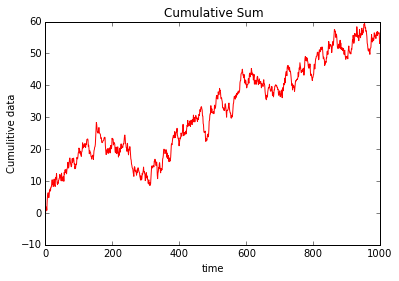

In [141]:
def mkred():
    x=np.random.randn(1000)
    sum=0
    arr=np.zeros(len(x))
    t=np.arange(0,len(x))
    for ind, num in enumerate(x):
        sum=sum+num
        arr[ind]=sum
    return arr

y=mkred()
t=np.arange(0,len(y),1.0)
fig, ax=plt.subplots()
ax.plot(t,y, 'r-')
ax.set_xlabel('time')
ax.set_ylabel('Cumulitive data ')
ax.set_title('Cumulative Sum')

**2** Write a second function to return the estimate of the power spectrum of $x$.  For posterity sake, include a value of the sampling frequency, and return the proper frequencies for the estimate.  Plot the resulting spectrum.

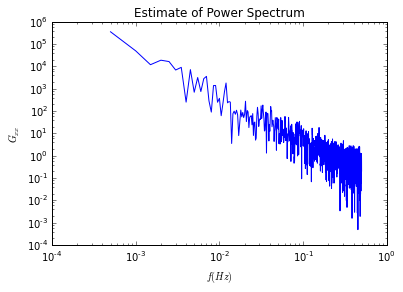

In [160]:
def powspec(x,t,f):
    dt=1.0
    T,F=np.meshgrid(t,f)
    E=np.exp(-1j*2.*np.pi*T*F)   #this does the for loop
    X= dt*np.dot(E,x)
    Sxx= np.conj(X)*X*2./t[-1]
    return Sxx

f=np.arange(0,0.5,.0005)
Gxx=powspec(y,t,f)
#Gxx=np.absolute(Gxx)
fig, ax=plt.subplots()
ax.loglog(f, Gxx, label='')
ax.set_xlabel('$f(Hz)$')
ax.set_ylabel('$G_{xx}$')
ax.set_title('Estimate of Power Spectrum')

    

**3** Now do the Monte-Carlo, by running the above 100 times and plotting the resulting spectral estimates as dots on the same plot. As you are making your data, save it into an array.  I did something like:
```python
    Gxs = zeros((1000,501))
    # inside my loop:
        Gxs[ind,:]=Gxx   
```

C:\Users\ldanyluk\Anaconda\lib\site-packages\ipykernel\__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


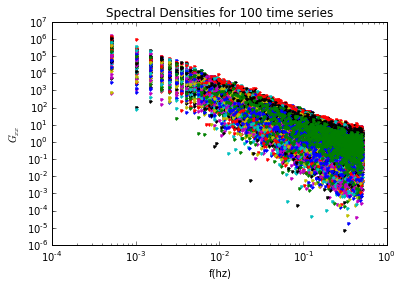

In [161]:
Gxs=np.zeros((100,1000))
for ind in range(100):
    y=mkred()
    t=np.arange(0,len(y))
    f=np.arange(0,0.5,.0005)
    Gxx=powspec(y,t,f)
    Gxs[ind,:]=Gxx

fig, ax=plt.subplots()
for ind, gxx in enumerate(Gxs):
    ax.loglog(f,gxx,'.' ,label='Gxx %d'%ind)
ax.set_ylabel('$G_{xx}$')
ax.set_xlabel('f(hz)')
ax.set_title('Spectral Densities for 100 time series')
#ax.legend(loc=0)

**4** Now, on the same plot, add the mean of all your $G_{xx}(f)$ estimates (as a function of $f$), and the upper and lower bounds encompasing 95% of the data. (Hint, sort each column of your matrix - `np.sort` - and plot the value at $0.025 N$ and $0.975 N$).


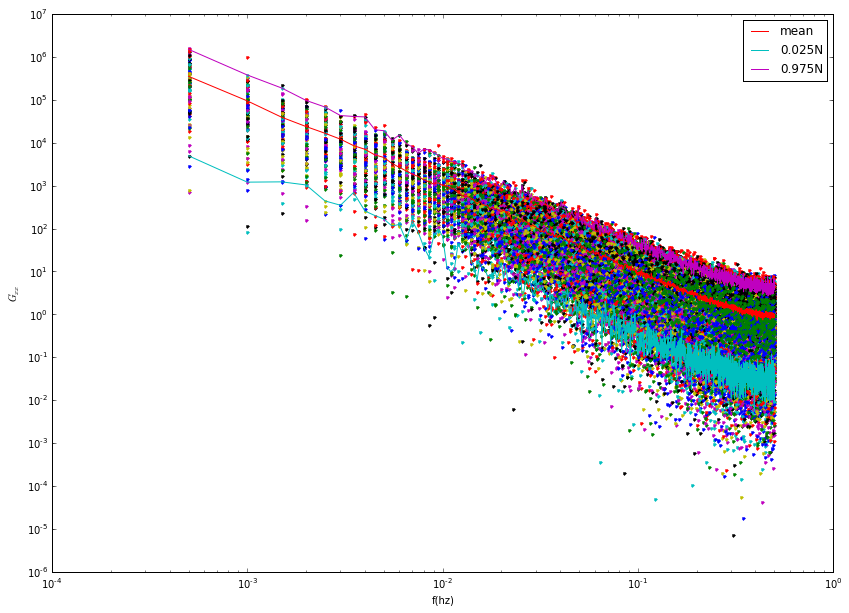

In [162]:
import scipy.stats as stats
mean=np.zeros(1000)
Gxssort=np.sort(Gxs,axis=0)
Gxst=np.transpose(Gxs)
for i, num in enumerate(Gxst):
    mean[i]=np.mean(Gxst[i])

fig=plt.figure(figsize=(14,10)) 
ax=fig.add_subplot(1,1,1)
for ind, gxx in enumerate(Gxs):
    ax.loglog(f,gxx,'.' )
ax.loglog(f,mean,'-', label='mean')
ax.loglog(f,Gxssort[3], '-',label='0.025N')
ax.loglog(f,Gxssort[98], '-', label='0.975N')
ax.set_ylabel('$G_{xx}$')
ax.set_xlabel('f(hz)')
#inter= stats.chi2.interval(0.95, df=2)
#ax.fill_between(f[1:],2.*Gxst[1:]/inter[1],2.*Gxst[1:]/inter[0], alpha=0.5,linewidth=0.0, edgecolor=None, color=None, facecolor='b')
ax.legend(loc=0)

The mean appears to be closer the upper bound than the lower. These bounds were found from sorting the columns of the Gxs matrix. 

**5** Show that the ratio of the lower and upper bounds of your spectral estimates spread compares favourably with the ratio between the lower and upper 95% confidence bounds of the  $\chi^2_2$ distribution.  Comment on any difference.

Ratio of upper to lower bound from 
95% confidence bounds: 175.302862083
Ratio of upper to lower bound from 
$\chi^2_2 $ distribution: 145.702956


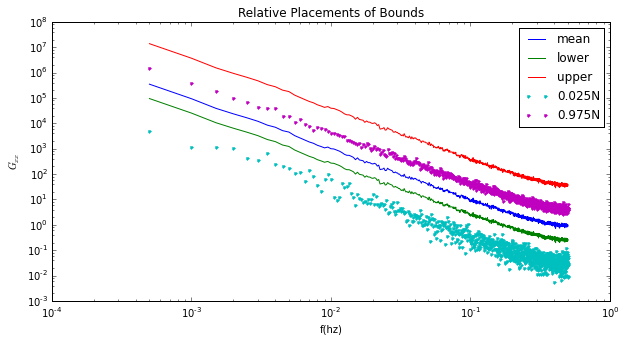

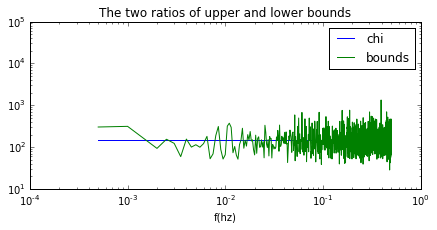

In [179]:
inter= stats.chi2.interval(0.95, df=2)
lower=2.0*mean/inter[1]
upper=2.0*mean/inter[0]
fig=plt.figure(figsize=(10,5)) 
ax=fig.add_subplot(1,1,1)
ax.loglog(f, mean, label='mean')
ax.loglog(f,lower, label='lower')
ax.loglog(f,upper, label='upper')
ax.loglog(f,Gxssort[3], '.',label='0.025N')
ax.loglog(f,Gxssort[98], '.', label='0.975N')
ax.set_ylabel('$G_{xx}$')
ax.set_xlabel('f(hz)')
ax.set_title('Relative Placements of Bounds')
ax.legend(loc=0)

estRatio=Gxssort[98]/Gxssort[3]
estRatio1=np.mean(estRatio)
ratio= upper/lower
ratio1= np.mean(ratio)
print 'Ratio of upper to lower bound from '
print '95% confidence bounds: '+str(estRatio1)
print 'Ratio of upper to lower bound from '
print '$\chi^2_2 $ distribution: %f' %ratio1
fig=plt.figure(figsize=(7,3)) 
ax=fig.add_subplot(1,1,1)
ax.loglog(f, ratio, label='chi')
ax.loglog(f,estRatio, label='bounds')
ax.legend(loc=0)
ax.set_xlabel('f(hz)')
ax.set_title('The two ratios of upper and lower bounds')

The two ratios of the upper and lower bounds compare reasonalbly well,
the first calculated from the sorted data was 175.303, and the second 
from the $\chi^2_2$ estimate was 145.703. This difference could be because for the sorted data calculation, as only 100 trials were done for the Monte Carlo, there were not 0.025N and 0.975N integer values, so the values 3 and 98 were picked as the lower and upper bound. 
Perhpas if 1000 runs were done, this would be better. 
This method also used all the data to make the bounds, where as the $\chi^2_2$ method was based off the mean of the Gxx data. 

In graphing the two ratios as a function of t, the $\chi^2_2$ ratio is just a constant, but looking at the equation, this makes sense. 

'from the $\\chi^2_2$ estimate was 145.703. '